In [199]:
import pandas as pd

In [200]:
import numpy as np

In [201]:
import sklearn

In [202]:
 import chardet

In [252]:
import os

In [253]:
os.chdir('F:\SEM 2\AML')

In [254]:
pd.read_csv("spam.csv", encoding = 'Latin-1' )

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [267]:
import chardet 
with open("spam.csv", 'rb') as f:
    result = chardet.detect(f.read())  

print(result['encoding'])
df_raw = pd.read_csv('spam.csv', encoding=result['encoding'])

Windows-1252


In [268]:
df_raw.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [269]:
df = df_raw[['v1', 'v2']].rename(columns={'v1' : 'label', 'v2' : 'sms'})

In [270]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [274]:
#Dropping the duplicates
df.drop_duplicates(subset='sms',inplace=True) 

In [275]:
df.describe()

,label,sms
count,5169,5169
unique,2,5169
top,ham,"Yeah work is fine, started last week, all the ..."
freq,4516,1


In [276]:
df.groupby('label').count().reset_index()

,label,sms
0,ham,4516
1,spam,653


In [277]:
df['len'] = df['sms'].map(lambda x: len(x))

In [278]:
df.groupby('label').agg({'sms': 'count', 'len' : 'mean'}).reset_index()

,label,sms,len
0,ham,4516,70.459256
1,spam,653,137.891271


In [279]:
from sklearn.model_selection import train_test_split

X = df['sms']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

print("Shape of X is {}".format(X.shape))
print("Shape of X_train is {} and shape of y_train is {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is {} and shape of y_test is {}".format(X_test.shape, y_test.shape))

train_corpus = list(X_train)

Shape of X is (5169,)
Shape of X_train is (3876,) and shape of y_train is (3876,)
Shape of X_test is (1293,) and shape of y_test is (1293,)


In [280]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as mplot

In [245]:
#Classifier - Logistic Regression
#Mostly used for Binary Classification Problem, here we have two classes - 1.Spam 2.Ham
#Logistic Regression transforms its output to give a probability value which is then mapped to
#two or more discrete classes based on a thresold value.

In [217]:
#Model_1: Logistic Regression

from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=56)
pipeline_LR = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', logistic_regression)])

In [281]:
#Change to binary variable to get the Precision-Recall curve

def change_to_binary(label):
    if label == 'ham':
        return 1
    else:
        return 0

In [282]:
#Cross Validation Score

cv_score_LR = cross_val_score(pipeline, X_train, y_train, cv=5)
print("The cross validation score for Logistic Regression is:")
print(cv_score_LR)

The cross validation score for Logistic Regression is:
[0.96907216 0.95747423 0.96129032 0.96387097 0.96382429]


In [ ]:
#Precision - The ratio of correctly predicted positive observations to the total predicted positive observations.
#Recall - The ratio of correctly predicted positive observations to the all observations in actual class - yes.
#Precision = TP/TP+FP
#Recall = TP/TP+FN
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [283]:
##A confusion matrix is a table that is often used to describe the performance
#of a "classifier" on a set of test data for which the true values are known.
#The four values inside the table corresponds to four different cases - 
#1.True Positive  2.True Negative  3.False Positive  4.False Negative

##The classification report visualizer displays the precision, recall, F1, and support scores for the model.

##The precision-recall curve shows the tradeoff between precision and recall for different threshold.The default thresold in Logistic Regression Model is 0.5

Accuracy:  0.974477958236659
Precision:  [0.9735269  0.98360656]
Recall:  [0.99824869 0.79470199]
F1 score:  [0.98573281 0.87912088]
Confusion Matrix:
[[1140    2]
 [  31  120]]
Report:
             precision    recall  f1-score   support

        ham       0.97      1.00      0.99      1142
       spam       0.98      0.79      0.88       151

avg / total       0.97      0.97      0.97      1293

The precision recall curve


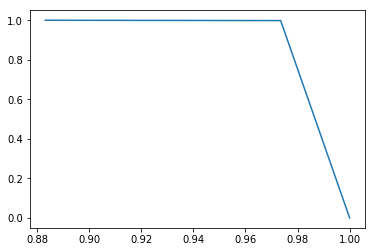

In [227]:
#Accuracy,Precision ,Recall,Precision-Recall Curve,Confusion Matrix,Classification Report for Logistic Regression Model

from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pipeline_LR.fit(X_train, y_train)
y_predicted_LR = pipeline_LR.predict(X_test)

y_test_bin = [change_to_binary(label) for label in list(y_test)] 
y_predicted_bin_LR = [change_to_binary(label) for label in list(y_predicted_LR)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test,y_predicted_LR)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_predicted_LR))
print("Report:")
print(classification_report(y_test,y_predicted_LR))

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(y_test_bin, y_predicted_bin_LR)
mplot.plot(precision, recall)

In [284]:
#Classifier- Decision Tree
#Decision Trees are a type of Supervised Machine Learning where the data is continuously split according to a certain parameter. 
#The tree can be explained by two entities, namely decision nodes and leaves. 
#The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split.

In [285]:
#Model 2: Decision Tree

from sklearn.tree import DecisionTreeClassifier

#Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.
#It means an attribute with lower gini index should be preferred.

model_DT = DecisionTreeClassifier(criterion="gini",random_state=27)
pipeline_DT = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', model_DT)])

In [286]:
#Cross Validation Score
cv_score_DT = cross_val_score(pipeline_3, X_train, y_train, cv=5)
print("The cross validation score for Decision Tree Model is:")
print(cv_score_DT)

The cross validation score for Decision Tree Model is:
[0.94329897 0.94716495 0.95483871 0.95870968 0.9625323 ]


Accuracy:  0.9621036349574633
Precision:  [0.97480452 0.85915493]
Recall:  [0.98248687 0.80794702]
F1 score:  [0.97863061 0.83276451]
Confusion Matrix:
[[1122   20]
 [  29  122]]
Report:
             precision    recall  f1-score   support

        ham       0.97      0.98      0.98      1142
       spam       0.86      0.81      0.83       151

avg / total       0.96      0.96      0.96      1293

The precision recall curve


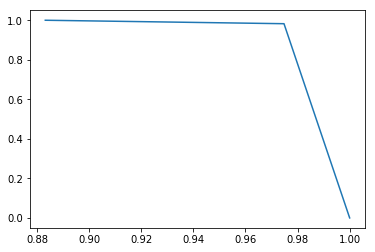

In [287]:
#Accuracy,Precision ,Recall,Precision-Recall Curve,Confusion Matrix,Classification Report for Decision Tree Model

from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pipeline_DT.fit(X_train, y_train)
y_predicted_DT = pipeline_DT.predict(X_test)

y_test_bin = [change_to_binary(label) for label in list(y_test)] 
y_predicted_bin_DT = [change_to_binary(label) for label in list(y_predicted_DT)]

accuracy = accuracy_score(y_test, y_predicted_DT)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test,y_predicted_DT)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_predicted_DT))
print("Report:")
print(classification_report(y_test,y_predicted_DT))

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(y_test_bin, y_predicted_bin_DT)
mplot.plot(precision, recall)

In [238]:
#Classifier - Random Forest
#Random forest classifier creates a set of decision trees from randomly selected subset of training set. 
#It then aggregates the votes from different decision trees to decide the final class of the test object.
#This works well because a single decision tree may be prone to a noise, 
#but aggregate of many decision trees reduce the effect of noise giving more accurate results.

In [249]:
from sklearn.ensemble.forest import RandomForestClassifier
model_RF = RandomForestClassifier(random_state=26)
pipeline_RF = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', model_RF)])

In [250]:
#Cross Validation Score
cv_score_RF = cross_val_score(pipeline_RFC, X_train, y_train, cv=5)
print("The cross validation score for Random Forest Model is:")
print(cv_score_RF)

The cross validation score for Random Forest Model is:
[0.97036082 0.95876289 0.96774194 0.96387097 0.95865633]


Accuracy:  0.9682907965970611
Precision:  [0.96771453 0.97413793]
Recall:  [0.99737303 0.74834437]
F1 score:  [0.98231997 0.84644195]
Confusion Matrix:
[[1139    3]
 [  38  113]]
Report:
             precision    recall  f1-score   support

        ham       0.97      1.00      0.98      1142
       spam       0.97      0.75      0.85       151

avg / total       0.97      0.97      0.97      1293

The precision recall curve


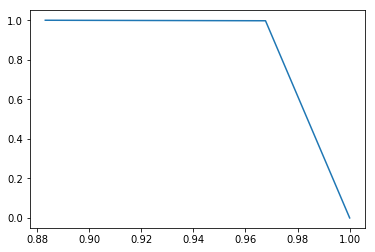

In [251]:
#Accuracy,Precision ,Recall,Precision-Recall Curve,Confusion Matrix,Classification Report

from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pipeline_RF.fit(X_train, y_train)
y_predicted_RF = pipeline_RF.predict(X_test)

y_test_bin = [change_to_binary(label) for label in list(y_test)] 
y_predicted_bin_RF = [change_to_binary(label) for label in list(y_predicted_RF)]

accuracy = accuracy_score(y_test, y_predicted_RF)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test,y_predicted_RF)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_predicted_RF))
print("Report:")
print(classification_report(y_test,y_predicted_RF))

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(y_test_bin, y_predicted_bin_RF)
mplot.plot(precision, recall)

In [ ]:
#Naive Bayes are a family of powerful and easy-to-train classifiers, which determine the probability of an outcome,
#given a set of conditions using the Bayes’ theorem.
#3 types of Naive Bayes Classifier - 1.Gaussian 2.Multinomial 3.Bernoulli
#The Bernoulli naive Bayes classifier assumes that all our features are binary such that they take only two values.

In [263]:
from sklearn.naive_bayes import BernoulliNB
model_BNB = BernoulliNB()
pipeline_BNB = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', model_BNB)])

In [264]:
#Cross Validation Score
cv_score_BNB = cross_val_score(pipeline_BNB, X_train, y_train, cv=5)
print("The cross validation score for Bernoulli Naive Bayes Model is:")
print(cv_score_BNB)

The cross validation score for Gaussian Naive Bayes Model is:
[0.9742268  0.96778351 0.97032258 0.97290323 0.96382429]


Accuracy:  0.9760247486465584
Precision:  [0.97438087 0.99180328]
Recall:  [0.99912434 0.8013245 ]
F1 score:  [0.98659749 0.88644689]
Confusion Matrix:
[[1141    1]
 [  30  121]]
Report:
             precision    recall  f1-score   support

        ham       0.97      1.00      0.99      1142
       spam       0.99      0.80      0.89       151

avg / total       0.98      0.98      0.97      1293

The precision recall curve


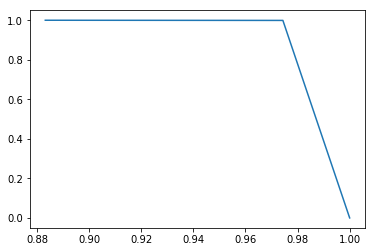

In [265]:
#Accuracy,Precision ,Recall,Precision-Recall Curve,Confusion Matrix,Classification Report

from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pipeline_BNB.fit(X_train, y_train)
y_predicted_BNB = pipeline_BNB.predict(X_test)

y_test_bin = [change_to_binary(label) for label in list(y_test)] 
y_predicted_bin_BNB = [change_to_binary(label) for label in list(y_predicted_BNB)]

accuracy = accuracy_score(y_test, y_predicted_BNB)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test,y_predicted_BNB)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_predicted_BNB))
print("Report:")
print(classification_report(y_test,y_predicted_BNB))

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(y_test_bin, y_predicted_bin_BNB)
mplot.plot(precision, recall)